In [ ]:
'''Nous allons travailler sur le jeu de données très classique iris pour faire de la classification non supervisée'''

In [1]:
#import des librairies l'environnement
import pandas as pd
import numpy as np
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

In [2]:
#chargement de base de données iris
iris = datasets.load_iris()

# Le jeu de données Iris contient trois variantes de la fleur Iris. 
# Il contient 150 instances (ligne du jeu de donnée). 
# Chaque instance est composée de quatre attributs pour décrire une fleur d’Iris. 
# Le jeu de données est étiquetée par le type de fleur. 
# Ainsi pour quatre attributs décrivant une fleur d’Iris, on saura de quelle variante il s’agit.

In [3]:
#affichage des données, vous permet de mieux comprendre le jeu de données (optionnel) 
print(iris)


{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [4]:
print(iris.data)


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [4]:
print(iris.feature_names)


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
print(iris.target)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [7]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [8]:
#Stocker les données en tant que DataFrame Pandas 
x=pd.DataFrame(iris.data)
# définir les noms de colonnes
x.columns=['Sepal_Length','Sepal_width','Petal_Length','Petal_width']
y=pd.DataFrame(iris.target)
y.columns=['Targets']

In [9]:
# Maintenant qu’on a mis les données dans le bon format (dans un Data Frame), 
# l’entrainement de K-Means est simple avec la librairie Scikit-Learn.
# Il suffit d’instancier un objet de la classe kmeans en lui indiquant le nombre de clusters qu’on veut former. 
# Par la suite il faut appeler la méthode fit() pour calculer les clusters.

#Cluster K-means
model=KMeans(n_clusters=3)
#Adapter le modèle de données
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [10]:
# Le  code ci-dessous permet d’afficher le clustering fait par l’algorithme K-Means :
print(model.labels_)
# QUESTION : comment lire le résultat ?
# REPONSE : Les 1 représentent les fleurs qui sont classées dans le cluster 1, les 2 sont les fleurs du cluster 2 et 
# les 0 sont celles du cluster 3 

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


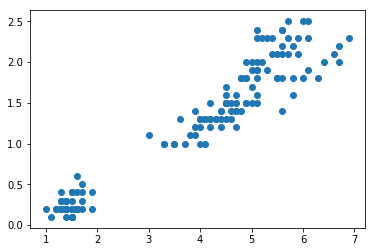

In [11]:
# un tableau de la sorte n’est pas très parlant. 
# Vu que notre jeu de données est relativement petit, 
# on peut visualiser graphiquement notre jeu de données pour observer les clusters formés.

plt.scatter(x.Petal_Length, x.Petal_width)

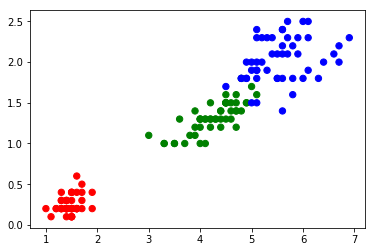

In [12]:
# En nous basant sur la longueur et la largeur de chaque pétale, 
# on peut afficher, dans un plan 2D, les différentes fleurs de notre jeu de données. 
# Visuellement, on voit qu’il y a deux grands groupes qui se forment.
#Ici, nous traçons la longueur et la largeur des pétales, 
# mais chaque tracé change les couleurs des points en utilisant soit  colormap [y.Targets] 
# pour la classe originale et colormap [model.labels_] pour la classe prédite.
colormap=np.array(['Red','green','blue'])
plt.scatter(x.Petal_Length, x.Petal_width,c=colormap[y.Targets],s=40)


In [13]:
# QUESTION : 
# comment interprétez vous le résultat de cette classification ?
# L'approche non supervisée donne glogalement une classification assez proche de l'approche supervisée
# On voit bien la répartition en trois classes différentes, même si les chances de se tromper sont plus grandes entre 
# les clusters 2 et 3

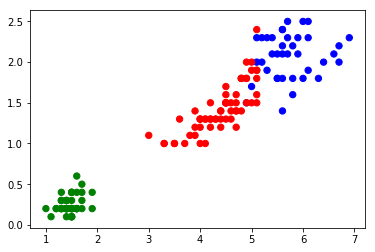

In [14]:
colormap=np.array(['Red','green','blue'])
plt.scatter(x.Petal_Length, x.Petal_width,c=colormap[model.labels_],s=40)
